In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/Users/ramonmora/Desktop/TKH/Cybersecurity-Intrusion-Analysis/data/AWS_Honeypot_marx-geo.csv')

In [22]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [23]:
df.columns

Index(['datetime', 'host', 'src', 'proto', 'type', 'spt', 'dpt', 'srcstr',
       'cc', 'country', 'locale', 'localeabbr', 'postalcode', 'latitude',
       'longitude', 'Unnamed: 15'],
      dtype='object')

In [24]:
df.dtypes

datetime        object
host            object
src              int64
proto           object
type           float64
spt            float64
dpt            float64
srcstr          object
cc              object
country         object
locale          object
localeabbr      object
postalcode      object
latitude       float64
longitude      float64
Unnamed: 15    float64
dtype: object

# Data Dictionary

- **date time (object)**: Represents the date and time of the intrusion event in "MM/DD/YY HH:MM" format.
- **host (object)**: The identifier of the host system where the intrusion event occurred.
- **src (int64)**: A unique code representing the source of the data intrusion.
- **proto (object)**: The communication protocol used in the intrusion event, such as TCP or UDP.
- **type (float64)**: Additional information or categorization of the intrusion event.
- **spt (float64)**: The source port number used by the intruder.
- **dpt (float64)**: The destination port number on the host where the intrusion occurred.
- **srcstr (object)**: The source IP address of the intrusion.
- **cc (object)**: The country code representing the country of the source.
- **country (object)**: The name of the country associated with the source address.
- **locale (object)**: A more specific location within the country, such as a city or region.
- **localeabbr (object)**: An abbreviation for the locale.
- **postalcode (object)**: The postal code or ZIP code for the source address.
- **latitude (float64)**: The latitude coordinate for the source address.
- **longitude (float64)**: The longitude coordinate for the source address.

In [25]:
df.info

<bound method DataFrame.info of             datetime               host         src proto  type      spt  \
0       3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
1       3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0   
2       3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0   
3       3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0   
4       3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0   
...              ...                ...         ...   ...   ...      ...   
451576   9/8/13 5:54     groucho-oregon  1922977453   TCP   NaN  62175.0   
451577   9/8/13 5:50         groucho-eu  1017974360   TCP   NaN   6000.0   
451578   9/8/13 5:55     groucho-oregon  3234358955   TCP   NaN   6000.0   
451579   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   
451580   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   

           dpt           srcstr  cc        country     

In [26]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [27]:
df.isna().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

In [28]:
df["host"].value_counts()

host
groucho-tokyo        126189
groucho-oregon        94076
groucho-singapore     78151
groucho-us-east       31779
groucho-norcal        24566
groucho-sydney        24456
groucho-sa            24316
zeppo-norcal          24094
groucho-eu            23954
Name: count, dtype: int64

# Missing Values

**Shape of dataset**: 451,581 rows × 16 columns

## Columns with Missing Values and Actions:

- **type (406,770 missing)**: Drop, too many missing values.
- **spt (44,811 missing)**: Needs to be addressed (action to be decided).
- **dpt (44,811 missing)**: Needs to be addressed (action to be decided).
- **cc (3,596 missing)**: Needs to be addressed (action to be decided).
- **country (3,634 missing)**: Needs to be addressed (action to be decided).
- **locale (109,469 missing)**: 1/4th missing data for locale (action to be decided).
- **localeabbr (119,876 missing)**: Needs to be addressed (action to be decided).
- **postalcode (365,103 missing)**: Majority postal code missing - potential drop.
- **latitude (3,469 missing)**: Setting NA to zero.
- **longitude (3,428 missing)**: Setting NA to zero.

# Univariate Analysis

<Axes: xlabel='country'>

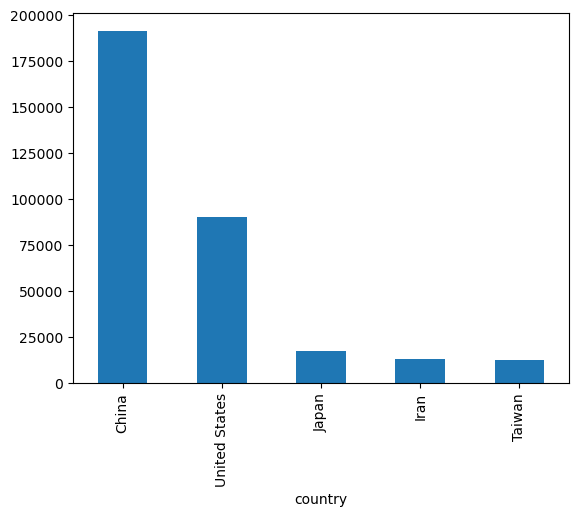

In [37]:
df["country"].value_counts().head().plot.bar()

<Axes: xlabel='locale'>

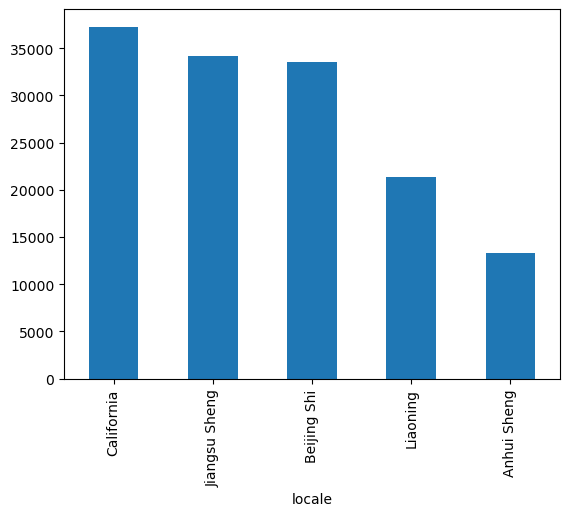

In [38]:
df["locale"].value_counts().head().plot.bar()

In [39]:
df["country"].value_counts()

country
China            191394
United States     89982
Japan             17204
Iran              13042
Taiwan            12148
                  ...  
Andorra               2
Bermuda               1
Barbados              1
Namibia               1
Cape Verde            1
Name: count, Length: 177, dtype: int64

<Axes: xlabel='country'>

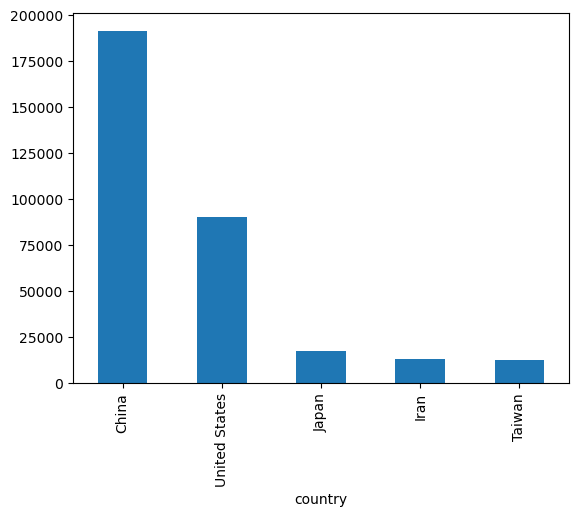

In [40]:
country_counts = df["country"].value_counts()
country_counts.nlargest().plot.bar()


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')
# Plotting the distribution of intrusion events over time
plt.figure(figsize=(12, 6))
df["datetime"].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Intrusion Events Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()


KeyError: 'date time'

<Figure size 1200x600 with 0 Axes>

# Bivariate Analysis